In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0. Data processing and visualization
load winequality-white.csv dataset and make exploratory data analysis

In [2]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


See zero values

In [6]:
for feature in df.columns:
    print(f'Zeros in "{feature}":  ', str((df[feature]==0).sum()))

Zeros in "fixed acidity":   0
Zeros in "volatile acidity":   0
Zeros in "citric acid":   19
Zeros in "residual sugar":   0
Zeros in "chlorides":   0
Zeros in "free sulfur dioxide":   0
Zeros in "total sulfur dioxide":   0
Zeros in "density":   0
Zeros in "pH":   0
Zeros in "sulphates":   0
Zeros in "alcohol":   0
Zeros in "quality":   0


In [7]:
y = df.quality.copy()
X = df.drop('quality', axis=1)

In [8]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [9]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## 1. Decision trees classification
In this task we will try to predict wine quality based on its features by fitting a decision tree model. Fit a decision tree classifier by making a grid search over loss functions: 'giny', 'entropy' and over max_leaf_nodes parameter. Choose this parameters via 5-Fold cross-validation. Visualize the best model's tree diagram

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image, display

In [11]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [5, 10, 20, 50, 100]    
}

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=2)

In [14]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] ................. criterion=gini, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] ................. criterion=gini, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] ................. criterion=gini, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] ................. criterion=gini, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] ................. criterion=gini, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10 ...............................
[CV] ................ criterion=gini, max_leaf_nodes=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10 ...............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ criterion=gini, max_leaf_nodes=50, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=50 ...............................
[CV] ................ criterion=gini, max_leaf_nodes=50, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=50 ...............................
[CV] ................ criterion=gini, max_leaf_nodes=50, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=50 ...............................
[CV] ................ criterion=gini, max_leaf_nodes=50, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=100 ..............................
[CV] ............... criterion=gini, max_leaf_nodes=100, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=100 ..............................
[CV] ............... criterion=gini, max_leaf_nodes=100, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=100 ..............................
[CV] ............... criterion=gini, max_leaf_nodes=100, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=100 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 10, 20, 50, 100]},
             verbose=2)

In [15]:
search.best_score_

0.5418572601454376

In [16]:
search.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 100}

In [17]:
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=100)

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=100)

In [19]:
y_pred_train = clf.predict(X_train)

In [20]:
accuracy_score(y_train, y_pred_train)

0.6562021439509954

In [22]:
y_pred_tree = clf.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred_tree)

0.5204081632653061

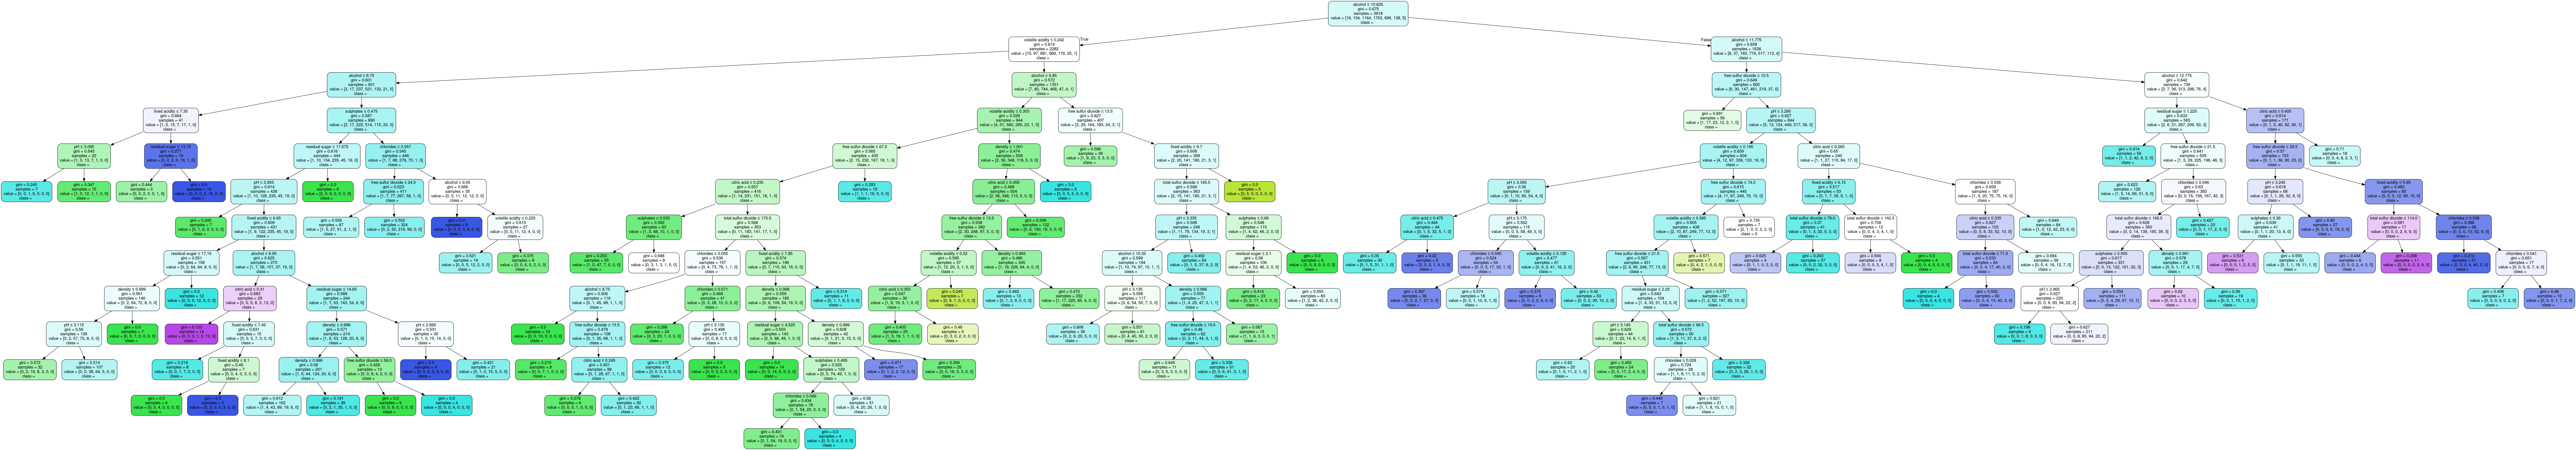

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=str(y),  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('colored_tree.png')



def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)


## 2. Comparison classification
Try to predict wine quality with other classification tools that we studied(Logistic Regression, SVM, LDA) compare the accuracies and f-scores of all models on the test set and choose the best performing algorithm. 

### SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm_clf = SVC()

In [28]:
svm_clf.fit(X_train, y_train)

SVC()

In [29]:
y_pred_svm = svm_clf.predict(X_test)

### Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
params = {
    'C': [0.1, 1, 10, 100],
    'multi_class':['auto', 'ovr', 'multinomial']
    }

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [55]:
lr_search = GridSearchCV(LogisticRegression(), params)
lr_search.fit(X_train_scaled, y_train)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial']})

In [56]:
lr_search.best_params_

{'C': 10, 'multi_class': 'auto'}

In [64]:
lr = LogisticRegression(C=10, multi_class='auto')
X_test_scaled = StandardScaler().fit_transform(X_test)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### LDA

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score

In [66]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [67]:
X_proj = lda.fit(X_train, y_train)

In [68]:
y_pred_lda = lda.predict(X_test)

In [69]:
from prettytable import PrettyTable

In [70]:
t = PrettyTable(['','Accuracy score', 'F1 score'])
t.add_row(['Decision tree', accuracy_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree, average='weighted')])
t.add_row(['SVM', accuracy_score(y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='weighted')])
t.add_row(['Logistic Regression', accuracy_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr, average='weighted')])
t.add_row(['LDA', accuracy_score(y_test, y_pred_lda), f1_score(y_test, y_pred_lda, average='weighted')])
print(t)

+---------------------+---------------------+---------------------+
|                     |    Accuracy score   |       F1 score      |
+---------------------+---------------------+---------------------+
|    Decision tree    |  0.5204081632653061 |  0.5058752648040546 |
|         SVM         | 0.44693877551020406 | 0.30953263929314495 |
| Logistic Regression |  0.5173469387755102 |  0.4802437799345619 |
|         LDA         |  0.5142857142857142 | 0.48933893395179134 |
+---------------------+---------------------+---------------------+


## 3. Decision trees regression
In this task we will use all the columns to predict alcohol concentration of a wine. Use the directives in task 1 as a guide to fit a Decision tree regressor.

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
y2 = df.alcohol
X2 = df.drop('alcohol', axis=1)

In [101]:
param_grid = {
    'max_leaf_nodes': [3, 5, 10, 20, 50, 100]    
}

In [102]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [103]:
search2 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=2)

In [104]:
search2.fit(X_train2, y_train2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_nodes=5 ................................................
[CV] ................................. max_leaf_nodes=5, total=   0.0s
[CV] max_leaf_nodes=5 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ max_leaf_nodes=20, total=   0.0s
[CV] max_leaf_nodes=20 ...............................................
[CV] ................................ max_leaf_nodes=20, total=   0.0s
[CV] max_leaf_nodes=50 ...............................................
[CV] ................................ max_leaf_nodes=50, total=   0.0s
[CV] max_leaf_nodes=50 ...............................................
[CV] ................................ max_leaf_nodes=50, total=   0.0s
[CV] max_leaf_nodes=50 ...............................................
[CV] ................................ max_leaf_nodes=50, total=   0.0s
[CV] max_leaf_nodes=50 ...............................................
[CV] ................................ max_leaf_nodes=50, total=   0.0s
[CV] max_leaf_nodes=50 ...............................................
[CV] ................................ max_leaf_nodes=50, total=   0.0s
[CV] max_leaf_nodes=100 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': [3, 5, 10, 20, 50, 100]}, verbose=2)

In [106]:
search2.best_params_

{'max_leaf_nodes': 100}

In [120]:
clf2 = DecisionTreeRegressor(max_leaf_nodes=100)

In [121]:
clf2.fit(X_train2, y_train2)

DecisionTreeRegressor(max_leaf_nodes=100)

In [122]:
y_pred_test2 = clf2.predict(X_test2)

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [129]:
print('MAE of Decision Tree Regressor', mean_absolute_error(y_test2, y_pred_test2))
print('RMSE of Decision Tree Regressor', mean_squared_error(y_test2, y_pred_test2, squared=False))

MAE of Decision Tree Regressor 0.3635662666326438
RMSE of Decision Tree Regressor 0.49054372326274664


## 4. Comparison regression
Predict wine alcohol concentration with Linear Regression. Compare mean absolute errors and rooted mean squared errors. What is the best model?

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
linear_clf = LinearRegression()
linear_clf.fit(X_train2, y_train2)

LinearRegression()

In [132]:
y_pred_linear2 = linear_clf.predict(X_test2)

In [134]:
print('MAE of Linear Regressor', mean_absolute_error(y_test2, y_pred_linear2))
print('RMSE of Linear Regressor', mean_squared_error(y_test2, y_pred_linear2, squared=False))

MAE of Linear Regressor 0.3003292527807436
RMSE of Linear Regressor 0.39366653116109723


### Linear regression is better